In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import scipy.sparse as sp
import joblib
import os

In [18]:
diretorio_destino= "../data"
tfidf_title = joblib.load(os.path.join(diretorio_destino, 'tfidf_title.pkl'))
tfidf_abstract = joblib.load(os.path.join(diretorio_destino, 'tfidf_abstract.pkl'))


In [19]:
# Concatena os vetores de título e resumo horizontalmente
X = sp.hstack([tfidf_title, tfidf_abstract])

In [23]:
inertias = []
cluster_range = range(1, 11)  # Testar de 1 a 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

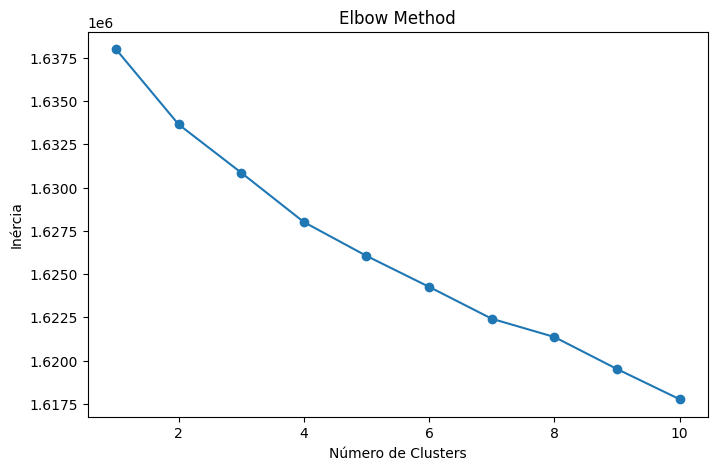

In [24]:
import matplotlib.pyplot as plt
# Plotar o gráfico Elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")
plt.show()

In [31]:
# Aplicar K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)


KMeans(n_clusters=3, random_state=42)

In [32]:
# Verificar os clusters
print("Centroides dos clusters:", kmeans.cluster_centers_)

Centroides dos clusters: [[8.16484644e-07 9.77885428e-07 9.44702111e-07 ... 0.00000000e+00
  2.82845755e-07 5.34634905e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.11969325e-06
  0.00000000e+00 0.00000000e+00]]


In [33]:
# Atribuir os rótulos (clusters) aos dados de treino
labels = kmeans.labels_

labels

array([2, 1, 0, ..., 0, 0, 0], dtype=int32)

In [34]:
predict=kmeans.predict(X)

In [ ]:
# Calculando o Silhouette Score
silhouette_avg = silhouette_score(X, predict)
print(f"Silhouette Score: {silhouette_avg}")

In [37]:
# Reduzir para 2D usando PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

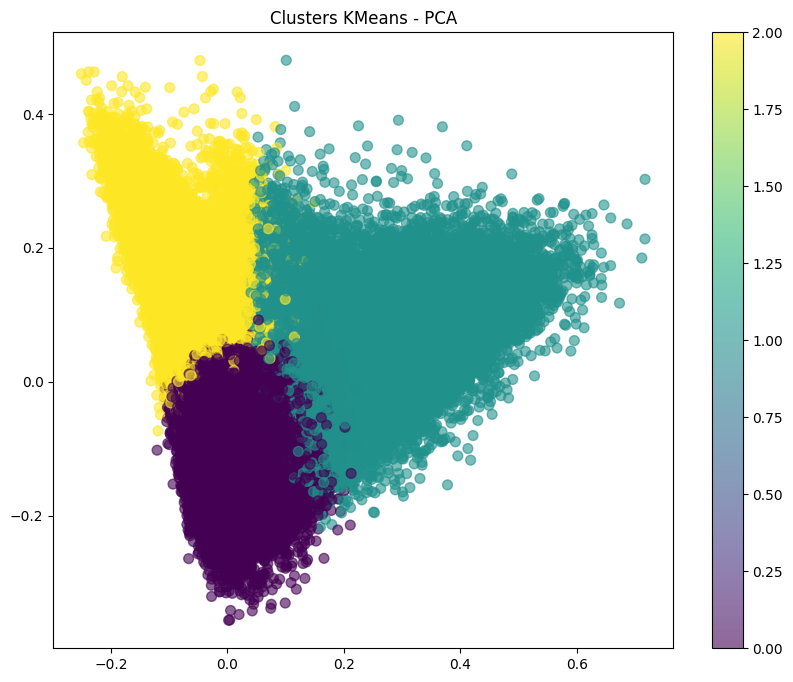

In [48]:
# Obter as previsões dos clusters
y_kmeans = kmeans.predict(X)

# Plotar os clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.title("Clusters KMeans - PCA")
plt.colorbar()
plt.show()

In [43]:
# Carregar os vetorizadores
tfidf_vectorizer_title = joblib.load(os.path.join(diretorio_destino,'tfidf_vectorizer_title.pkl'))
tfidf_vectorizer_abstract = joblib.load(os.path.join(diretorio_destino,'tfidf_vectorizer_abstract.pkl'))

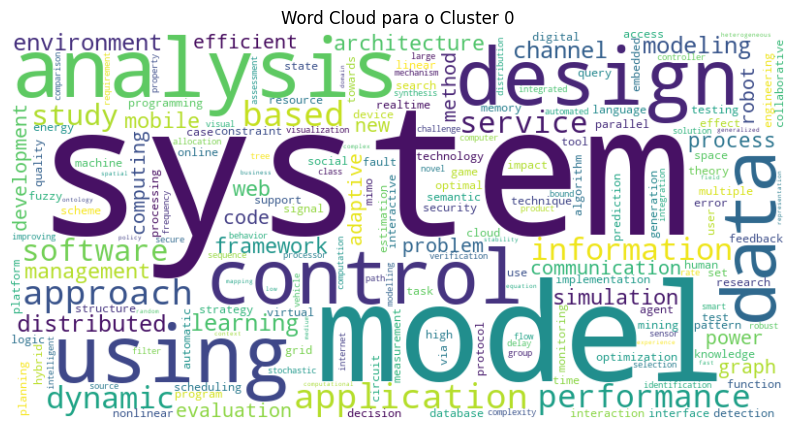

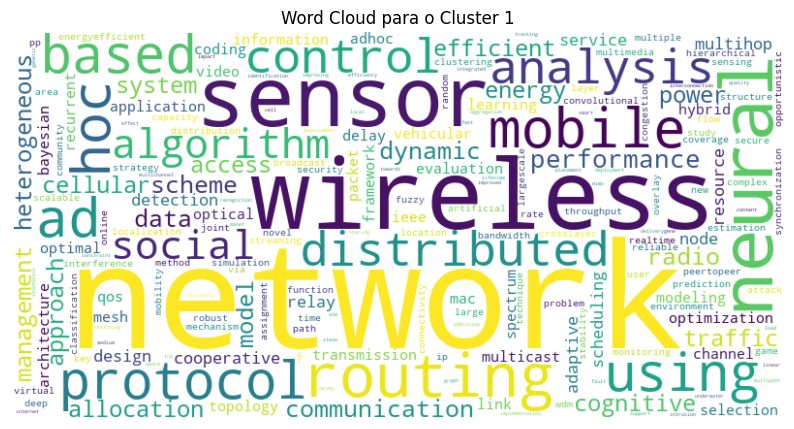

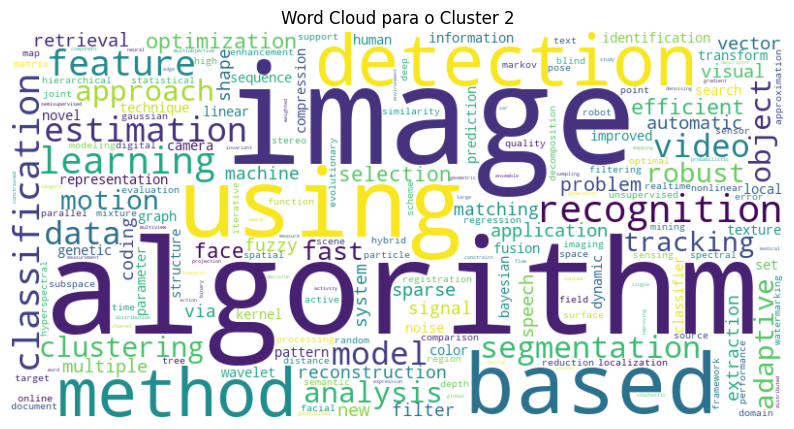

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_for_cluster(cluster_id, tfidf_vectorizer, X, labels):
    cluster_data = X[labels == cluster_id]

    words_freq = cluster_data.sum(axis=0).A1  
    terms = tfidf_vectorizer.get_feature_names_out()  

    words_dict = {terms[i]: words_freq[i] for i in range(len(terms)) if words_freq[i] > 0}

    # Gerar a nuvem de palavras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_dict)

    # Plotar a nuvem de palavras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud para o Cluster {cluster_id}')
    plt.show()

for i in range(kmeans.n_clusters):
    plot_wordcloud_for_cluster(i, tfidf_vectorizer_title, X, kmeans.labels_)
